<a href="https://colab.research.google.com/github/marcoantonioafernandes/bootcamp_data_science_projetos/blob/main/Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---



#**Bootcamp Data Science Aplicada da Alura** 
#Projeto do Módulo 1 - Dados sobre a Covid 19 no Brasil

---
---


> Autor: Marco Antônio de Almeida Fernandes

> Email: marcoantonioafernandes@gmail.com

> LinkedIn: https://www.linkedin.com/in/marcoaafernandes/

> Github: https://github.com/marcoantonioafernandes

---
---



---
---
## Resumo
---
---

O primeiro caso de covid 19 no Brasil foi notificado em 26/02/2020 na cidade de São Paulo e desde então vivemos a pior epidemia da história deste país, que tirou milhares de vidas e mudou completamente a forma com que as pessoas vivem e se relacionam.

Antes de se alastrar pelo Brasil a doença se alastrou por alguns países europeus, como a itália e a espanha, o que trouxe tempo e contexto sobre o que estava por vir para que o país se prepara-se. Apesar disso o que houve no país foi uma divergência entre os poderes e a falta de um plano concreto de enfrentamento a pandemia, o que levou cada localidade a enfrentar a pandemia de uma forma diferente e resultou em 14.731.678 de pessoas contaminadas e 406.733 óbitos

Este projeto teve o intuito de apresentar um panorama da epidemia de covid 19 no Brasil. Os dados foram divididos e apresentados em dados nacionais, dados regionais e dados estaduais, o que possibilitou uma melhor análise sobre o desempenho do país no enfrentamento a epidemia.



https://oglobo.globo.com/sociedade/linha-do-tempo-mostra-os-principais-fatos-da-pandemia-no-brasil-24897725

---
---
## Obtenção dos dados
---
---

A base de dados utilizada foi disponibilizada pelo portal BrasilIO e possui os casos confirmados e óbitos obtidos dos boletins das Secretarias Estaduais de Saúde (SES).

Fonte: https://brasil.io/


---
---
##Importando bibliotecas
---
---

In [42]:
# Bibliotecas numéricas e de dados
import pandas as pd
import numpy as np

#Biblioteca de datas
from datetime import date

# Bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.ticker as ticker
import matplotlib.dates as dates


---
---
##Obtenção e validação dos dados
---
---


---
--- 
###Importando os dados
---
---

In [43]:
full_data_covid = pd.read_csv('/content/drive/MyDrive/Bootcamp Data Science Alura/Projeto 1/new_caso_full.csv')

full_data_covid.head()


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


---
Descrição das colunas da base de dados de acordo com a [documentação](https://github.com/turicas/covid19-br/blob/master/api.md#casos) disponibilizada pelo Brasil IO.



* **city:** nome do município (pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também).

* **city_ibge_code:** código IBGE do local.

* **date:** data de coleta dos dados no formato YYYY-MM-DD.

* **epidemiological_week:** número da semana epidemiológica no formato YYYYWW.

* **estimated_population:** população estimada para esse município/estado em 2020, segundo o IBGE. (acesse o script que faz o download e conversão dos dados de população).

* **estimated_population_2019:** população estimada para esse município/estado em 2019, segundo o IBGE. ATENÇÃO: essa coluna possui valores desatualizados, prefira usar a coluna estimated_population.

* **is_last:** campo pré-computado que diz se esse registro é o mais novo para esse local, pode ser True ou False (caso filtre por esse campo, use is_last=True ou is_last=False, não use o valor em minúsculas).

* **is_repeated:** campo pré-computado que diz se as informações nesse registro foram publicadas pela Secretaria Estadual de Saúde no dia date ou se o dado é repetido do último dia em que o dado está disponível (igual ou anterior a date). Isso ocorre pois nem todas as secretarias publicam boletins todos os dias. Veja também o campo last_available_date.

* **last_available_confirmed:** número de casos confirmados do último dia disponível igual ou anterior à data date.

* **last_available_confirmed_per_100k_inhabitants:** número de casos confirmados por 100.000 habitantes (baseado em estimated_population) do último dia disponível igual ou anterior à data date.

* **last_available_date:** data da qual o dado se refere.

* **last_available_death_rate:** taxa de mortalidade (mortes / confirmados) do último dia disponível igual ou anterior à data date.

* **last_available_deaths:** número de mortes do último dia disponível igual ou anterior à data date.

* **order_for_place:** número que identifica a ordem do registro para este local. O registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.

* **place_type:** tipo de local que esse registro descreve, pode ser city ou state.

* **state:** sigla da unidade federativa, exemplo: SP.

* **new_confirmed:** número de novos casos confirmados desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).

* **new_deaths:** número de novos óbitos desde o último dia (note que caso is_repeated seja True, esse valor sempre será 0 e que esse valor pode ser negativo caso a SES remaneje os casos desse município para outro).
---

---
---
###Avaliando e tratando os dados
---
---

In [44]:
full_data_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000368 entries, 0 to 2000367
Data columns (total 18 columns):
 #   Column                                         Dtype  
---  ------                                         -----  
 0   city                                           object 
 1   city_ibge_code                                 float64
 2   date                                           object 
 3   epidemiological_week                           int64  
 4   estimated_population                           float64
 5   estimated_population_2019                      float64
 6   is_last                                        bool   
 7   is_repeated                                    bool   
 8   last_available_confirmed                       int64  
 9   last_available_confirmed_per_100k_inhabitants  float64
 10  last_available_date                            object 
 11  last_available_death_rate                      float64
 12  last_available_deaths                     

---

Vamos corrigir o tipo da coluna date que está como object e deve ser convertida para datetime.

---

In [45]:
full_data_covid["date"] = pd.to_datetime(full_data_covid["date"], format="%Y-%m-%d")
full_data_covid.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


---

Vamos verificar o período analisado

---

In [46]:
print('Período analisado: ', full_data_covid['date'].min(), ' - ', full_data_covid['date'].max())

Período analisado:  2020-02-25 00:00:00  -  2021-05-01 00:00:00


---

Vamos verificar os dados quais informações estão com valpor nulo

---

In [47]:
full_data_covid.isnull().sum()

city                                             11209
city_ibge_code                                    7376
date                                                 0
epidemiological_week                                 0
estimated_population                              7376
estimated_population_2019                         7376
is_last                                              0
is_repeated                                          0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants    22895
last_available_date                                  0
last_available_death_rate                            0
last_available_deaths                                0
order_for_place                                      0
place_type                                           0
state                                                0
new_confirmed                                        0
new_deaths                                           0
dtype: int

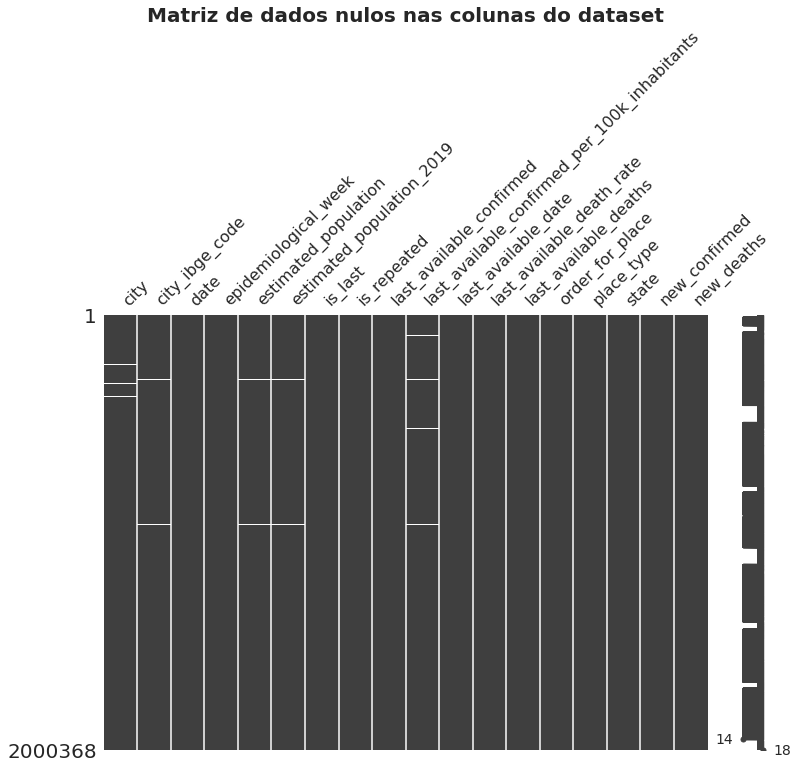

In [49]:
font = {
  'size': 20,
  'weight':'bold'
}

ax = msno.matrix(full_data_covid, figsize=(12,8))
ax.set_title("Matriz de dados nulos nas colunas do dataset", fontdict=font)
plt.show()


---


P: Por que a coluna city tem valores nulos?

R: Como podemos observar os dados de cidade estão nulos por serem linhas que realizam a agregação por estado


---

In [50]:
full_data_covid[full_data_covid.city.isnull()]

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0000,0,1,state,AC,3,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0000,0,2,state,AC,0,0
5,NaN,12.0,2020-03-19,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0000,0,3,state,AC,1,0
7,NaN,12.0,2020-03-20,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0000,0,4,state,AC,3,0
9,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0000,0,5,state,AC,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999807,NaN,17.0,2021-04-27,202117,1590248.0,1572866.0,False,False,158332,9956.43447,2021-04-27,0.0158,2509,406,state,TO,1442,36
1999947,NaN,17.0,2021-04-28,202117,1590248.0,1572866.0,False,False,159142,10007.36992,2021-04-28,0.0159,2529,407,state,TO,810,20
2000087,NaN,17.0,2021-04-29,202117,1590248.0,1572866.0,False,False,159716,10043.46492,2021-04-29,0.0159,2546,408,state,TO,574,17
2000227,NaN,17.0,2021-04-30,202117,1590248.0,1572866.0,True,False,160449,10089.55836,2021-04-30,0.0159,2559,409,state,TO,733,13


In [51]:
print("Cidades vazias são as que tem place_type == state. Conforme a consulta são ", full_data_covid.query("city.isnull() and place_type == 'state'", engine="python").shape[0], " de cidades com valor nulo.")

Cidades vazias são as que tem place_type == state. Conforme a consulta são  11209  de cidades com valor nulo.




---


P: Por que a coluna city tem valores "Importados/Indefinidos"?

R: Existem cidades que estão definidas como Importados/Indefinidos. A explicação encontrada na documentação para estes valores é a seguinte: 



> "city: Pode estar em branco quando o registro é referente ao estado, pode ser preenchido com Importados/Indefinidos também".



P: Por que a coluna estimated_population_2019, estimated_population, city_ibge_code tem valores nulos?

R: Como existem cidades com o valor "Importados/Indefindos" não existe uma estimativa da população e um código do IBGE. 

---



In [52]:
full_data_covid.query("city == 'Importados/Indefinidos'")

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
8606,Importados/Indefinidos,NaN,2020-03-29,202014,NaN,NaN,False,False,4,NaN,2020-03-29,0.0,0,1,city,AL,4,0
8610,Importados/Indefinidos,NaN,2020-03-30,202014,NaN,NaN,False,False,4,NaN,2020-03-30,0.0,0,2,city,AL,0,0
8614,Importados/Indefinidos,NaN,2020-03-31,202014,NaN,NaN,False,False,4,NaN,2020-03-31,0.0,0,3,city,AL,0,0
8618,Importados/Indefinidos,NaN,2020-04-01,202014,NaN,NaN,False,False,4,NaN,2020-04-01,0.0,0,4,city,AL,0,0
8622,Importados/Indefinidos,NaN,2020-04-02,202014,NaN,NaN,False,False,4,NaN,2020-04-02,0.0,0,5,city,AL,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947793,Importados/Indefinidos,NaN,2021-04-27,202117,NaN,NaN,False,True,552,NaN,2021-04-26,0.0,0,405,city,SP,0,0
1948440,Importados/Indefinidos,NaN,2021-04-28,202117,NaN,NaN,False,True,552,NaN,2021-04-26,0.0,0,406,city,SP,0,0
1949087,Importados/Indefinidos,NaN,2021-04-29,202117,NaN,NaN,False,True,552,NaN,2021-04-26,0.0,0,407,city,SP,0,0
1949734,Importados/Indefinidos,NaN,2021-04-30,202117,NaN,NaN,False,True,552,NaN,2021-04-26,0.0,0,408,city,SP,0,0




---


Podemos observar que na coluna city existem dois valores que significam que aquele campo não foi preenchido, que são NaN e Importados/Indefinidos. Para padronizar estes valores e poder contabilizar da forma correta vamos converter os valores Importados/Indefinidos para NaN.


---



In [53]:
full_data_covid["city"] = full_data_covid["city"].replace("Importados/Indefinidos", np.nan)
full_data_covid[full_data_covid.city == "Importados/Indefindos"]

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths




---


P: Por que a coluna confirmed_per_100k_inhabitants tem valores nulos?

R: As 20817 linhas vazias de confirmed_per_100k_inhabitants são por  nessas cidades não existirem casos confirmados ou não ter a população estimada, o que também está ligando a indefinição da cidade na importação (valores "Importados/Indefinidos").

---



In [54]:
full_data_covid[full_data_covid.last_available_confirmed_per_100k_inhabitants.isnull()]

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
431,Manoel Urbano,1200344.0,2020-05-13,202020,9581.0,9459.0,False,False,0,NaN,2020-05-13,0.0,0,1,city,AC,0,0
436,Porto Walter,1200393.0,2020-05-13,202020,12241.0,11982.0,False,False,0,NaN,2020-05-13,0.0,0,1,city,AC,0,0
453,Manoel Urbano,1200344.0,2020-05-14,202020,9581.0,9459.0,False,False,0,NaN,2020-05-14,0.0,0,2,city,AC,0,0
458,Porto Walter,1200393.0,2020-05-14,202020,12241.0,11982.0,False,False,0,NaN,2020-05-14,0.0,0,2,city,AC,0,0
475,Manoel Urbano,1200344.0,2020-05-15,202020,9581.0,9459.0,False,False,0,NaN,2020-05-15,0.0,0,3,city,AC,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961380,Mateiros,1712702.0,2020-07-27,202031,2729.0,2684.0,False,False,0,NaN,2020-07-27,0.0,0,66,city,TO,0,0
1961520,Mateiros,1712702.0,2020-07-28,202031,2729.0,2684.0,False,False,0,NaN,2020-07-28,0.0,0,67,city,TO,0,0
1961660,Mateiros,1712702.0,2020-07-29,202031,2729.0,2684.0,False,False,0,NaN,2020-07-29,0.0,0,68,city,TO,0,0
1961800,Mateiros,1712702.0,2020-07-30,202031,2729.0,2684.0,False,False,0,NaN,2020-07-30,0.0,0,69,city,TO,0,0


Na tabela acima podemos reparar que aparentemente os dados da coluna confirmed_per_100k_inhabitants estão associadas a cidades com falta de casos confirmados, porém se observarmos a fórmula para calcular o valor dessa coluna temos: 

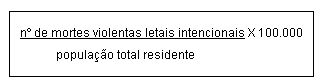

Vamos testar abaixo se as cidades com população estimada nula também são responsáveis pelos valores nulos na coluna confirmed_per_100k_inhabitants. 

In [55]:
print("Linhas vazias por não ter número de casos confirmados ou ter população estimada vazia:", full_data_covid[full_data_covid.last_available_confirmed_per_100k_inhabitants.isnull()].query("new_confirmed == 0 or estimated_population.isnull()", engine="python").shape[0])

Linhas vazias por não ter número de casos confirmados ou ter população estimada vazia: 22420


Conclusões: Após explorar e tratar os dados nulos do dataset de covid 19 vamos optar por realizar a análise considerando os dados por estado (place_type == state). Os dados por cidade apresentaram alguns problemas como cidades Indefinidas e sem estimativa de habitantes.

---
---
##Exploração e visualização dos dados
---
---

###Dados nacionais

Vamos explorar os casos e óbitos diários e por semana epidemiológica. Além disso analisaremos os dados brutos e relativos a população brasileira.

In [56]:
#Obtendo o dataset por estado e agrupando os valores por data
brazil_data_by_date = full_data_covid.query("place_type == 'state'").groupby('date').agg('sum')
brazil_data_by_date.reset_index(inplace=True)
brazil_data_by_date.head()

,date,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,2020-02-25,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,1,1,0
1,2020-02-26,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,2,0,0
2,2020-02-27,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,3,0,0
3,2020-02-28,35.0,202009,46289333.0,45919049.0,0,0,2,0.00432,0.0,0,4,1,0
4,2020-02-29,35.0,202009,46289333.0,45919049.0,0,0,2,0.00432,0.0,0,5,0,0


In [57]:
#Formatando a semana epidemiológica no padrão: semana epidemiológica-ano
def format_epidemiological_week(epidemiological_week):
  return epidemiological_week[4:] + '-' + epidemiological_week[2:4]

In [58]:
#Obtendo o dataset por estado e agrupando os valores por data
brazil_data_by_epidemiological_week = full_data_covid.query("place_type == 'state'").groupby('epidemiological_week').agg('sum')
brazil_data_by_epidemiological_week.reset_index(inplace=True)

#Formatando os valores da coluna semana epidemiológica
brazil_data_by_epidemiological_week.epidemiological_week = brazil_data_by_epidemiological_week.epidemiological_week.astype('str')
brazil_data_by_epidemiological_week.epidemiological_week = brazil_data_by_epidemiological_week.epidemiological_week.map(format_epidemiological_week)

brazil_data_by_epidemiological_week.head()

,epidemiological_week,city_ibge_code,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,09-20,175.0,2.314467e+08,2.295952e+08,0,0,7,0.01512,0.0000,0,15,2,0
1,10-20,551.0,4.212325e+08,4.180455e+08,0,1,50,0.23754,0.0000,0,79,17,0
2,11-20,2629.0,9.723243e+08,9.655304e+08,0,14,443,3.10819,0.0000,0,399,117,0
3,12-20,4692.0,1.357063e+09,1.346966e+09,0,19,3980,40.86336,0.1825,40,1230,996,18
4,13-20,5502.0,1.482290e+09,1.471030e+09,0,7,18782,204.97605,1.1806,450,2485,2821,97


In [59]:
#Obtendo a população do Brasil para cálculos relativos dos dados de covid
brazil_population = int(full_data_covid.groupby('state').agg({'estimated_population_2019':'max'}).sum())
print("População do Brasil pelo IBGE: {:,}".format(brazil_population).replace(',','.'))

População do Brasil pelo IBGE: 210.147.125


---
####Casos confirmados
---

---
#####Casos confirmados por dia
---

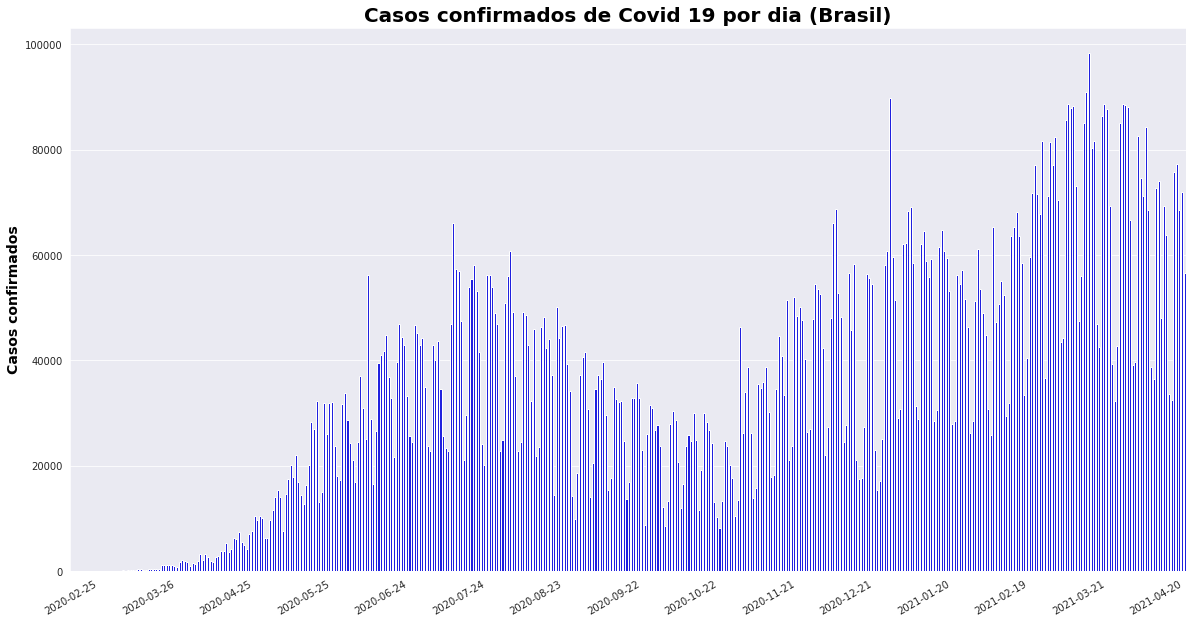

In [61]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.barplot(data=brazil_data_by_date, x="date", y="new_confirmed", color="blue")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Casos confirmados de Covid 19 por dia (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados", fontdict=axis_font);

#Configurando os labels e a disposição no eixo X.
plt.xticks(ticks=np.arange(0, brazil_data_by_date.date.shape[0], 30), labels=brazil_data_by_date.date[::30].astype('str').str[:10])

#MonthLocator não está funcionando com o barplot
# ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%Y'))
plt.xticks(rotation=30);

#####Casos confirmados por semana epidemiológica

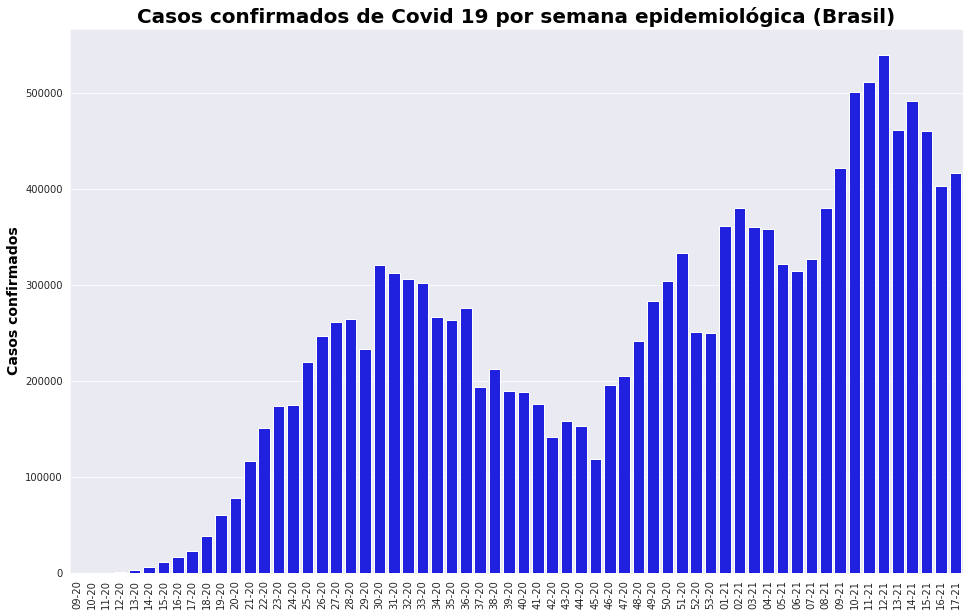

In [62]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))

#Plotando o gráfico
ax = sns.barplot(data=brazil_data_by_epidemiological_week, x="epidemiological_week", y="new_confirmed", color="blue")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Casos confirmados de Covid 19 por semana epidemiológica (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados", fontdict=axis_font);

#Configurando os labels e a disposição no eixo X.

# plt.xticks(ticks=np.arange(0, brazil_data_by_epidemiological_week.epidemiological_week.shape[0], 4), labels=brazil_data_by_epidemiological_week.epidemiological_week[::4])
plt.xticks(rotation=90);

#####Casos confirmados acumulados

In [63]:
brazil_data_by_date["cumulative_confirmed"] = brazil_data_by_date["new_confirmed"].cumsum()
brazil_data_by_date["cumulative_confirmed"]

0             1
1             1
2             1
3             2
4             2
         ...   
427    14457201
428    14534482
429    14603096
430    14675104
431    14731678
Name: cumulative_confirmed, Length: 432, dtype: int64

In [64]:
def cumulative_confirmed_plot_label_formater(x, pos):
  return int((x/1000000))

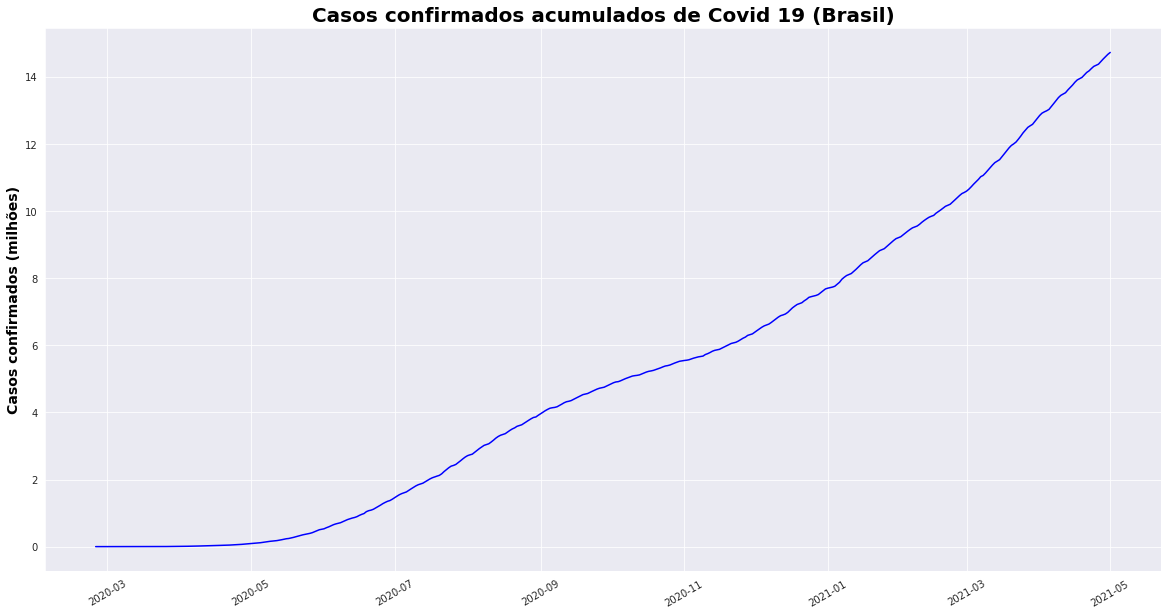

In [65]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.lineplot(data=brazil_data_by_date, x="date", y="cumulative_confirmed", color="blue")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Casos confirmados acumulados de Covid 19 (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados (milhões)", fontdict=axis_font);

ax.yaxis.set_major_formatter(ticker.FuncFormatter(cumulative_confirmed_plot_label_formater))
plt.xticks(rotation=30);

---
#####Observações casos confirmados
---



1.   No gráfico por dia é possível notar uma grande variação entre alguns dias, o que provavelmente se deve a algumas cidades não registrarem os casos no fim de semana, gerando picos de casos e óbitos nas segundas-feiras.


2.   Pelos gráficos apresentados podemos observar o surgimento de duas ondas da doença no Brasil e como acompanhamos pelo noticiário o Brasil foi um país privilegiadopor poder acompanhar a primeira e a segunda onda da doença se alastrarem na europa e américa de norte e dessa forma teve tempo para se preparar e adotar as medidas necessárias para frear os números, o que na prática não foi realizado[].


3.   Após cerca de 1 ano e 3 meses do primeiro caso de covid 19 acumulamos mais de 14 milhões de pessoas contaminadas, o que equivale a cerca de 7% da população. Este número seria maior se fossem contabilizados os infectados assintomáticos e muitos casos leves que não são testados, lembrando que considerando que o Brasil não é um dos paises que mais testam a doença [].

https://www.istoedinheiro.com.br/entre-os-10-paises-com-mais-casos-da-covid-brasil-e-o-que-faz-menos-testes/

https://www.canalsaude.fiocruz.br/canal/videoAberto/segunda-onda-de-covid-19-bcv-0127



####Óbitos

#####Óbitos por dia

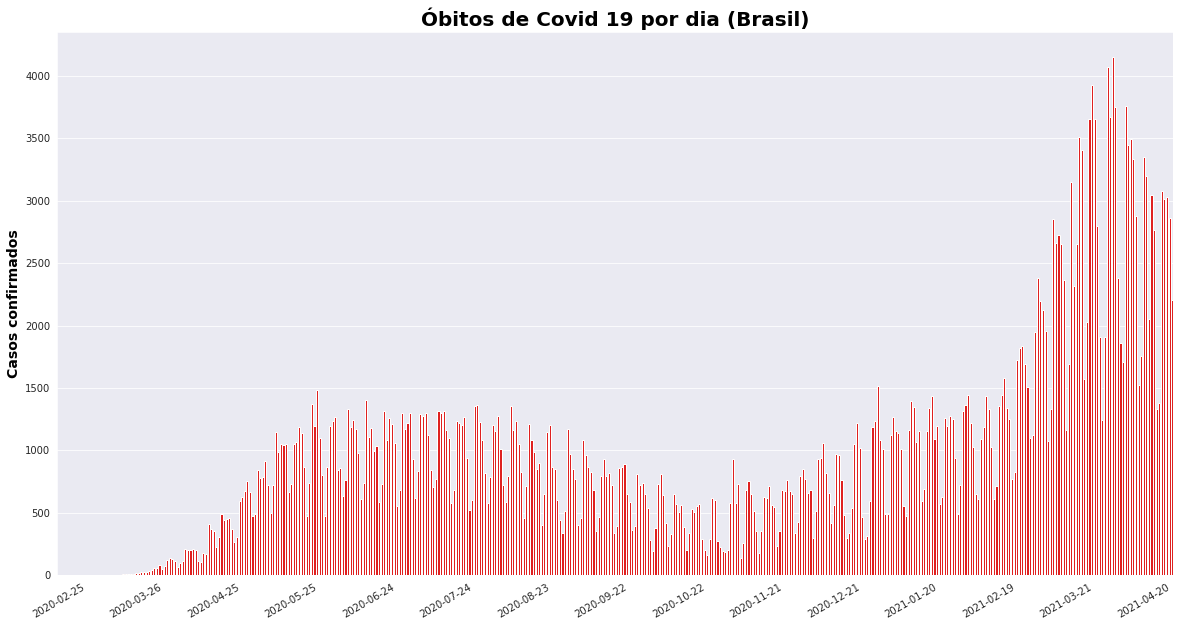

In [66]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.barplot(data=brazil_data_by_date, x="date", y="new_deaths", color="red")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Óbitos de Covid 19 por dia (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados", fontdict=axis_font);

#Configurando os labels e a disposição no eixo X.
plt.xticks(ticks=np.arange(0, brazil_data_by_date.date.shape[0], 30), labels=brazil_data_by_date.date[::30].astype('str').str[:10])

#MonthLocator não está funcionando com o barplot
# ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('%m/%Y'))
plt.xticks(rotation=30);

#####Óbitos por semana epidemiológica 

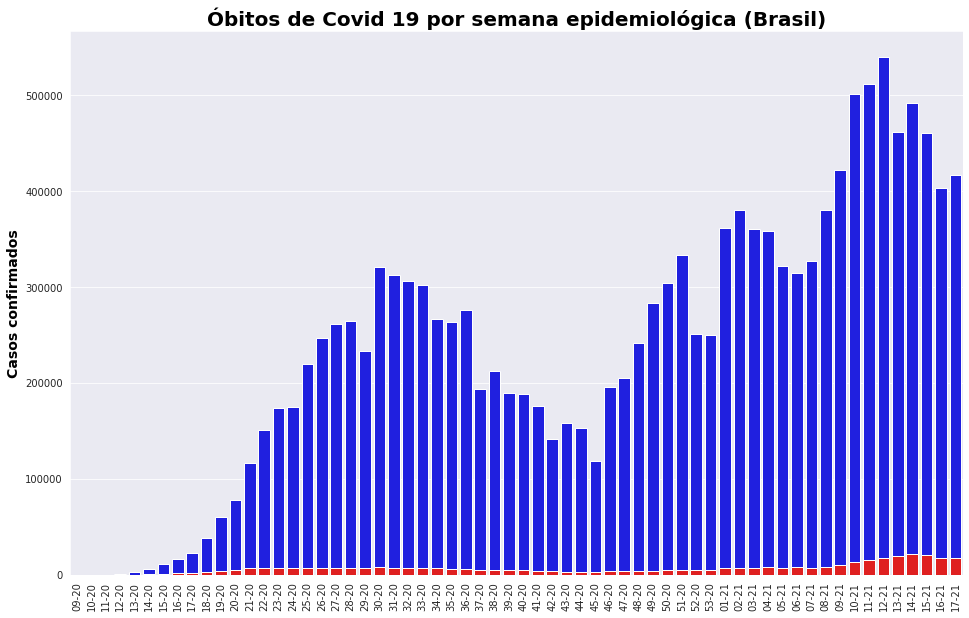

In [67]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(16,10))

#Plotando o gráfico
ax = sns.barplot(data=brazil_data_by_epidemiological_week, x="epidemiological_week", y="new_confirmed", color="blue")
ax = sns.barplot(data=brazil_data_by_epidemiological_week, x="epidemiological_week", y="new_deaths", color="red")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Óbitos de Covid 19 por semana epidemiológica (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados", fontdict=axis_font);

#Configurando os labels e a disposição no eixo X.

# plt.xticks(ticks=np.arange(0, brazil_data_by_epidemiological_week.epidemiological_week.shape[0], 2), labels=brazil_data_by_epidemiological_week.epidemiological_week[::2])
plt.xticks(rotation=90);

#####Óbitos acumulados

In [68]:
brazil_data_by_date["cumulative_deaths"] = brazil_data_by_date["new_deaths"].cumsum()
brazil_data_by_date["cumulative_deaths"]

0           0
1           0
2           0
3           0
4           0
        ...  
427    395623
428    398637
429    401669
430    404530
431    406733
Name: cumulative_deaths, Length: 432, dtype: int64

In [69]:
def cumulative_deaths_plot_label_formater(x, pos):
  return int((x/1000))

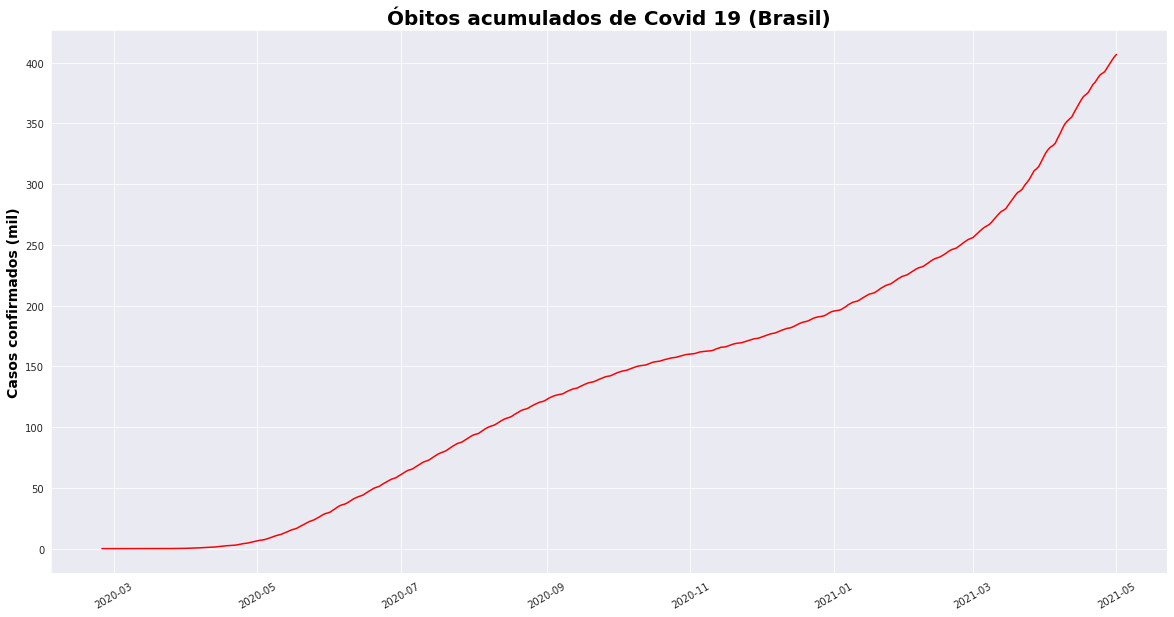

In [70]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.lineplot(data=brazil_data_by_date, x="date", y="cumulative_deaths", color="red")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Óbitos acumulados de Covid 19 (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados (mil)", fontdict=axis_font);

ax.yaxis.set_major_formatter(ticker.FuncFormatter(cumulative_deaths_plot_label_formater))
plt.xticks(rotation=30);

---
#####Observações sobre óbitos
---


1.   Os gráficos de óbitos diários e por semana epidemiológica seguem o padrão dos gráficos de casos de casos confirmados, o que é esperando, pois são diretamente proporcionais.

2.   O Brasil chegou ao número de 400 mil óbitos, sendo o segundo país do mundo com mais mortes por covid 19 [].

https://g1.globo.com/mundo/noticia/2021/04/29/ranking-da-covid-como-o-brasil-se-compara-a-outros-paises-em-mortes-casos-e-vacinas-aplicadas.ghtml



####Taxa de letalidade por dia, mortalidade e incidência.

In [71]:
#Obtendo o dataset por estado e agrupando os valores por data
teste = full_data_covid.query("place_type == 'state'").groupby('date').agg('sum')
teste.reset_index(inplace=True)
teste.head()

,date,city_ibge_code,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_death_rate,last_available_deaths,order_for_place,new_confirmed,new_deaths
0,2020-02-25,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,1,1,0
1,2020-02-26,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,2,0,0
2,2020-02-27,35.0,202009,46289333.0,45919049.0,0,0,1,0.00216,0.0,0,3,0,0
3,2020-02-28,35.0,202009,46289333.0,45919049.0,0,0,2,0.00432,0.0,0,4,1,0
4,2020-02-29,35.0,202009,46289333.0,45919049.0,0,0,2,0.00432,0.0,0,5,0,0


In [72]:
brazil_data_by_date["cumulative_confirmed"] = brazil_data_by_date["new_confirmed"].cumsum()
brazil_data_by_date["cumulative_deaths"] = brazil_data_by_date["new_deaths"].cumsum()
brazil_data_by_date[["cumulative_confirmed", "cumulative_deaths"]]

,cumulative_confirmed,cumulative_deaths
0,1,0
1,1,0
2,1,0
3,2,0
4,2,0
...,...,...
427,14457201,395623
428,14534482,398637
429,14603096,401669
430,14675104,404530


In [73]:
brazil_data_by_date["letality_rate_by_day"] = brazil_data_by_date["cumulative_deaths"]*100/brazil_data_by_date["cumulative_confirmed"]

A variação da taxa de letalidade é interessante ver em um gráfico e tirar conclusões do tipo, a taxa de motalidade diminuiu pois a nova variante do coronavirus é muito mais contagiosa, aumentando o denominador

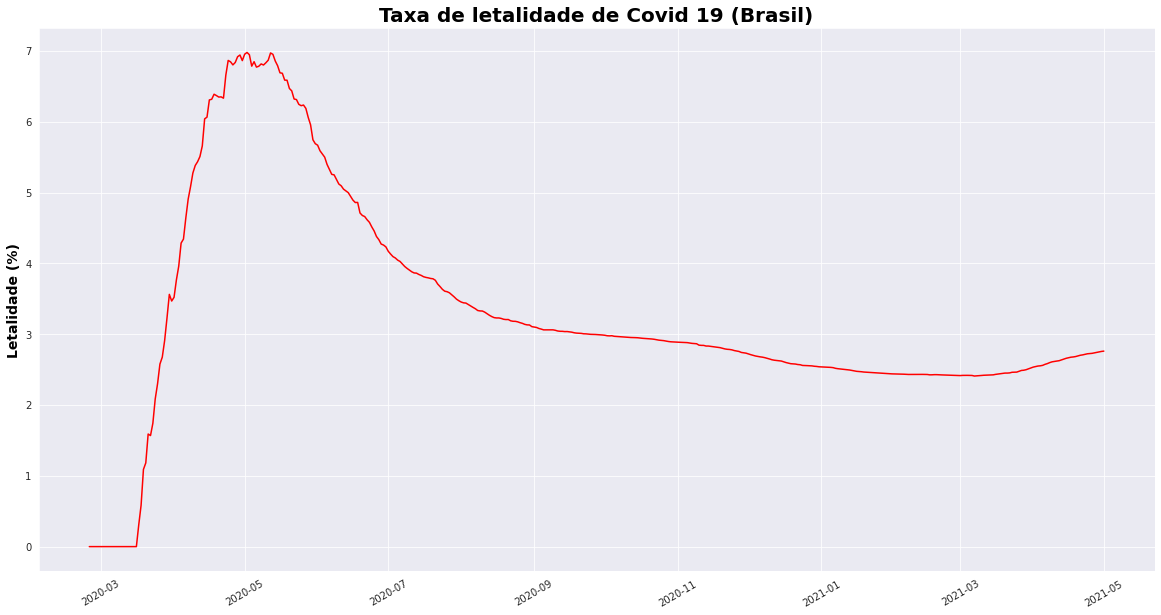

In [74]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.lineplot(data=brazil_data_by_date, x="date", y="letality_rate_by_day", color="red")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Taxa de letalidade de Covid 19 (Brasil)", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Letalidade (%)", fontdict=axis_font);

# ax.yaxis.set_major_formatter(ticker.FuncFormatter(cumulative_deaths_plot_label_formater))
plt.xticks(rotation=30);

In [75]:
mortality = brazil_data_by_date["new_deaths"].sum()*100000/brazil_population
incidence = brazil_data_by_date["new_confirmed"].sum()*100000/brazil_population
letality = (brazil_data_by_date["new_deaths"].sum()/brazil_data_by_date["new_confirmed"].sum())*100


print("Dados gerais da covid 19")
print("Mortalidade: ", mortality)
print("Letalidade: ", letality)
print("Incidência: ", incidence)

Dados gerais da covid 19
Mortalidade:  193.546782997864
Letalidade:  2.760941421608591
Incidência:  7010.173467755031


---
#####Observações taxa de letalidade, mortalidade e incidência
---


1.   No gráfico é possível notar que a taxa de letalidade nos primeiros meses tem uma grande evolução, chegando a um valor próximo de 7%, e logo depois tem uma queda e a estabilização entre 2% e 3%. Isto possivelmente se deve a chegada de um maior número de testes ao Brasil no começo de Abril [] e a criação testes mais acessíveis.

https://agenciabrasil.ebc.com.br/saude/noticia/2020-04/chegam-ao-brasil-500-mil-testes-para-diagnostico-da-covid-19

https://www.ictq.com.br/farmacia-clinica/1792-covid-19-novo-teste-chega-ao-mercado-por-r-69-e-garante-99-de-acerto

Para os cálculos foram utilizadas as fórmulas abaixo

* Letalidade: Taxa percentual de casos confirmados que evoluíram a óbito. Método de cálculo: (número de óbitos x 100) / número de casos confirmados.


* Incidência: Quantidade proporcional de casos confirmados para cada 100 mil de habitantes. A população considerada no cálculo é a última estimativa populacional do Instituto Brasileiro de Geografia e Estatística (IBGE). Método de cálculo: (casos confirmados * 100.000) / população.

* Mortalidade: Quantidade proporcional de óbitos para cada 100 mil habitantes, seguindo a mesma metodologia de cálculo da incidência de casos confirmados. Método de cálculo: (óbitos * 100.000) / população.




https://especiais.g1.globo.com/bemestar/coronavirus/estados-brasil-mortes-casos-media-movel/

https://g1.globo.com/bemestar/coronavirus/noticia/2021/05/03/brasil-tem-media-movel-de-2375-mortes-por-covid-a-cada-dia-total-de-obitos-vai-a-4088-mil.ghtml

###Dados regionais

In [76]:
regions = {
  11:	"Norte",
  12:	"Norte",
  13:	"Norte",
  14:	"Norte",
  15:	"Norte",
  16:	"Norte",
  17:	"Norte",
  21:	"Nordeste",
  22:	"Nordeste",
  23:	"Nordeste",
  24:	"Nordeste",
  25:	"Nordeste",
  26:	"Nordeste",
  27:	"Nordeste",
  28:	"Nordeste",
  29:	"Nordeste",
  31:	"Sudeste",
  32:	"Sudeste",
  33:	"Sudeste",
  35:	"Sudeste",
  41:	"Sul",
  42:	"Sul",
  43:	"Sul",
  50:	"Centro Oeste",
  51:	"Centro Oeste",
  52:	"Centro Oeste",
  53:	"Centro Oeste"
}

In [77]:
df_temp = full_data_covid.query("place_type == 'state'")
df_temp["region"] = df_temp["city_ibge_code"].map(regions)
df_temp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0,Norte
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0,Norte
5,NaN,12.0,2020-03-19,202012,894470.0,881935.0,False,False,4,0.44719,2020-03-19,0.0,0,3,state,AC,1,0,Norte
7,NaN,12.0,2020-03-20,202012,894470.0,881935.0,False,False,7,0.78259,2020-03-20,0.0,0,4,state,AC,3,0,Norte
9,NaN,12.0,2020-03-21,202012,894470.0,881935.0,False,False,11,1.22978,2020-03-21,0.0,0,5,state,AC,4,0,Norte


In [78]:
#Vamos verificar se não ficou algum campo sem o preenchimento
df_temp[df_temp["region"].isnull()]

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths,region


####Casos confirmados e óbitos totais por região

In [79]:
consolidated_data = df_temp.groupby(["region"]).sum()[["new_confirmed", "new_deaths"]]
consolidated_data.reset_index(inplace=True)

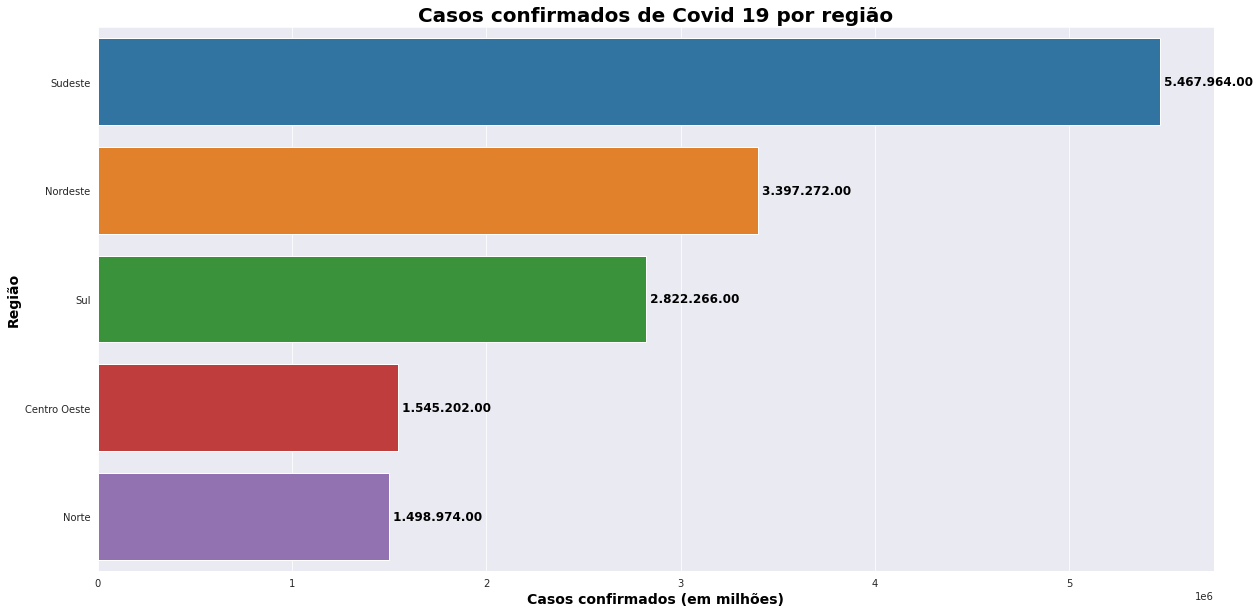

In [80]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(data=consolidated_data.sort_values("new_confirmed", ascending=False), x="new_confirmed", y="region")

title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Casos confirmados de Covid 19 por região", fontdict=title_font)
plt.xlabel("Casos confirmados (em milhões)", fontdict=axis_font)
plt.ylabel("Região", fontdict=axis_font);
for index, row in consolidated_data.sort_values("new_deaths", ascending=False).reset_index().iterrows():
  ax.text(row.new_confirmed, index, (' {:,.2f}').format(row.new_confirmed).replace(',','.'), fontdict=label, ha='left', va="center")
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "[%.2f]" % x))

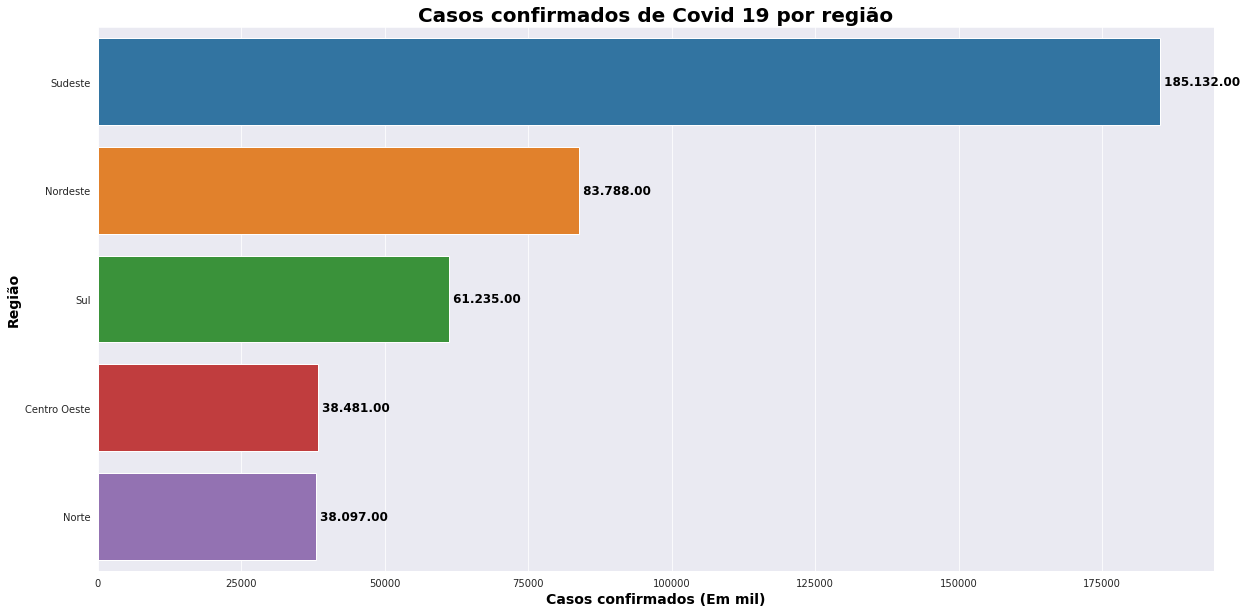

In [81]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

ax = sns.barplot(data=consolidated_data.sort_values("new_deaths", ascending=False), x="new_deaths", y="region")

title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Casos confirmados de Covid 19 por região", fontdict=title_font)
plt.xlabel("Casos confirmados (Em mil)", fontdict=axis_font)
plt.ylabel("Região", fontdict=axis_font);
for index, row in consolidated_data.sort_values("new_deaths", ascending=False).reset_index().iterrows():
  ax.text(row.new_deaths, index, (' {:,.2f}').format(row.new_deaths).replace(',','.'), fontdict=label, ha='left', va="center")

In [82]:
consolidated_data.columns = ["Região", "Casos confirmados", "Óbitos"]

In [83]:
consolidated_data["Em relação ao total de confirmados"] = consolidated_data["Casos confirmados"]/consolidated_data["Casos confirmados"].sum()*100
consolidated_data["Em relação ao total de óbitos"] = consolidated_data["Óbitos"]/consolidated_data["Óbitos"].sum()*100
consolidated_data

,Região,Casos confirmados,Óbitos,Em relação ao total de confirmados,Em relação ao total de óbitos
0,Centro Oeste,1545202,38481,10.488975,9.460998
1,Nordeste,3397272,83788,23.060998,20.600246
2,Norte,1498974,38097,10.175175,9.366587
3,Sudeste,5467964,185132,37.117048,45.516838
4,Sul,2822266,61235,19.157804,15.055331


####Evolução de casos confirmados de covid 19 acumulados por região

In [84]:
region_data_accumulated = df_temp.groupby(["region", "date"]).sum().groupby(["region"]).cumsum()
region_data_accumulated

city_ibge_code  ...  new_deaths
region       date                        ...            
Centro Oeste 2020-03-07            53.0  ...           0
             2020-03-08           106.0  ...           0
             2020-03-09           159.0  ...           0
             2020-03-10           212.0  ...           0
             2020-03-11           265.0  ...           0
...                                 ...  ...         ...
Sul          2021-04-27         51998.0  ...       59562
             2021-04-28         52124.0  ...       60007
             2021-04-29         52250.0  ...       60443
             2021-04-30         52376.0  ...       60882
             2021-05-01         52502.0  ...       61235

[2108 rows x 13 columns]

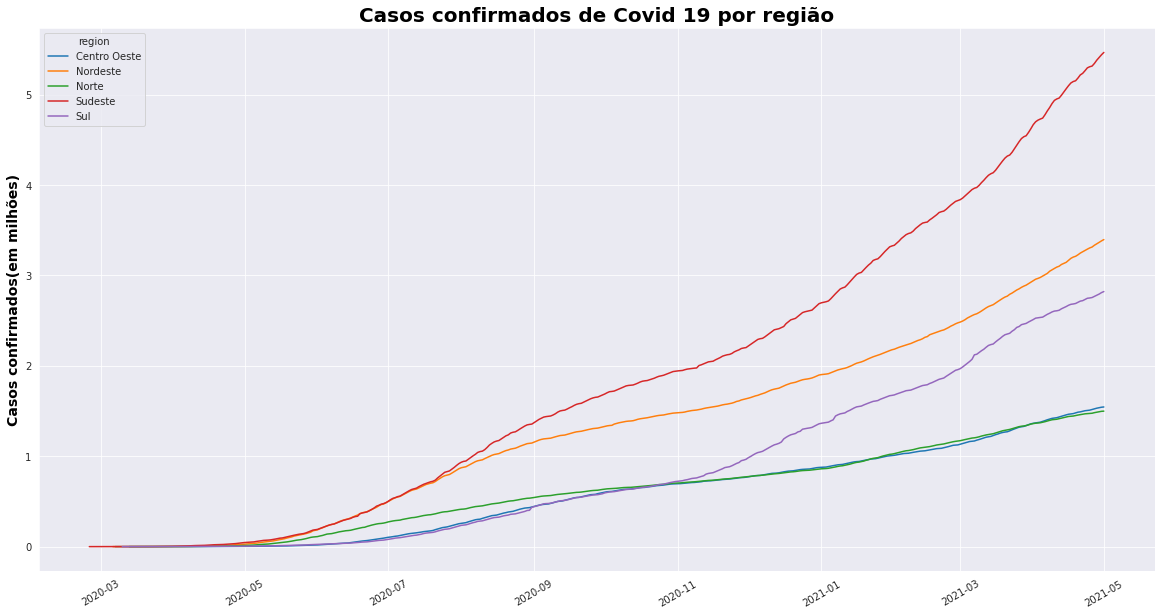

In [85]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.lineplot(data=region_data_accumulated, x="date", y="new_confirmed", hue="region", palette="tab10")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Casos confirmados de Covid 19 por região", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados(em milhões)", fontdict=axis_font);

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, pos: int(value/1000000)))

plt.xticks(rotation=30);

####Evolução de óbitos por covid19 acumulados por região

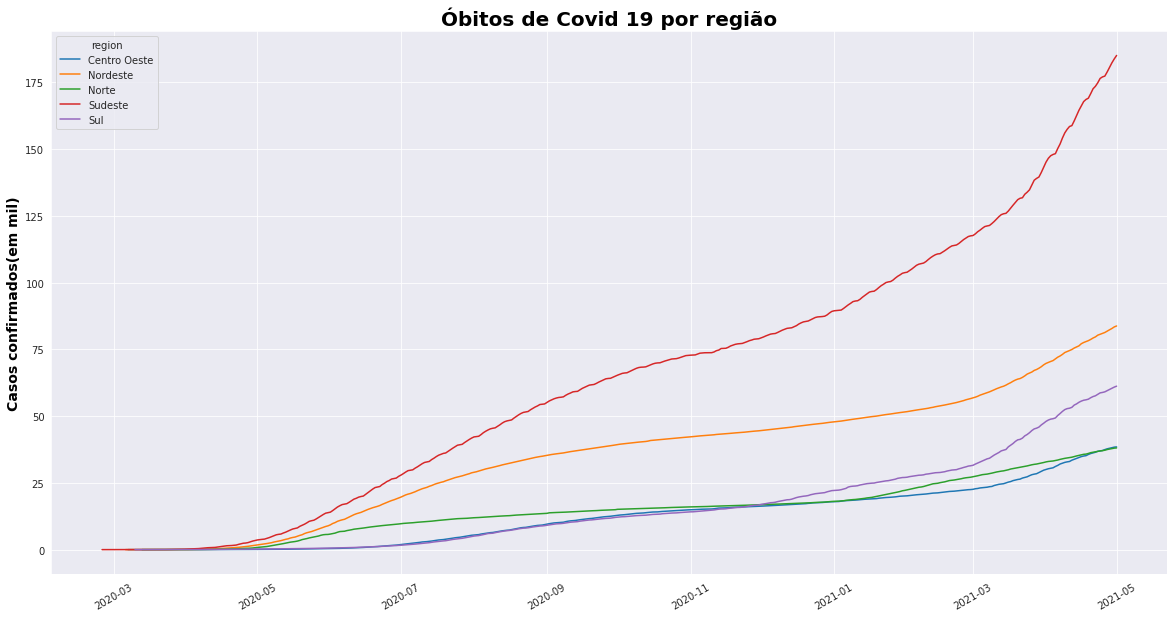

In [86]:
#Configurando o visual do gráfico
sns.set_style("darkgrid")
plt.figure(figsize=(20,10))

#Plotando o gráfico
ax = sns.lineplot(data=region_data_accumulated, x="date", y="new_deaths", hue="region", palette="tab10")

#Configurando o título e os labels dos eixos do gráfico
title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
  }

plt.title("Óbitos de Covid 19 por região", fontdict=title_font)
plt.xlabel("")
plt.ylabel("Casos confirmados(em mil)", fontdict=axis_font);

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda value, pos: int(value/1000)))

plt.xticks(rotation=30);

####Observações sobre os dados regionais de covid 19

In [87]:
region_data = df_temp.groupby(["region"]).sum()[["new_confirmed", "new_deaths", 'estimated_population']]
region_data.columns = ["confirmed", "deaths", "estimated_population"]
region_data

,confirmed,deaths,estimated_population
region,,,
Centro Oeste,1545202,38481,6.847237e+09
Nordeste,3397272,83788,2.384940e+10
Norte,1498974,38097,7.670485e+09
Sudeste,5467964,185132,3.800490e+10
Sul,2822266,61235,1.258285e+10


In [88]:
region_data["percent_confirmed"] = region_data["confirmed"]/region_data["confirmed"].sum()*100
region_data["percent_deaths"] = region_data["deaths"]/region_data["deaths"].sum()*100
region_data["percent_estimated_population"] = region_data["estimated_population"]/region_data["estimated_population"].sum()*100
region_data

,confirmed,deaths,estimated_population,percent_confirmed,percent_deaths,percent_estimated_population
region,,,,,,
Centro Oeste,1545202,38481,6.847237e+09,10.488975,9.460998,7.697428
Nordeste,3397272,83788,2.384940e+10,23.060998,20.600246,26.810674
Norte,1498974,38097,7.670485e+09,10.175175,9.366587,8.622895
Sudeste,5467964,185132,3.800490e+10,37.117048,45.516838,42.723800
Sul,2822266,61235,1.258285e+10,19.157804,15.055331,14.145204




1.   A percentual de casos confirmados e óbitos apresenta um valor próximo a de sua população, sendo o sudeste a região mais populosa, com cerca de 42.7% da população brasileira, e com 37.17% dos casos confirmados e 45.51% dos óbitos no Brasil.



###Dados estaduais

####Casos confirmados e óbitos totais por estado

In [89]:
data_by_state = full_data_covid.query("place_type == 'state'").groupby("state").sum()
data_by_state = data_by_state.sort_values("new_confirmed", ascending=False)
data_by_state.reset_index(inplace=True)
data_by_state = data_by_state[["state", "new_confirmed", "new_deaths"]]
data_by_state.head()

,state,new_confirmed,new_deaths
0,SP,2918044,96941
1,MG,1366602,34036
2,RS,979807,25086
3,PR,951882,22557
4,BA,905113,18561


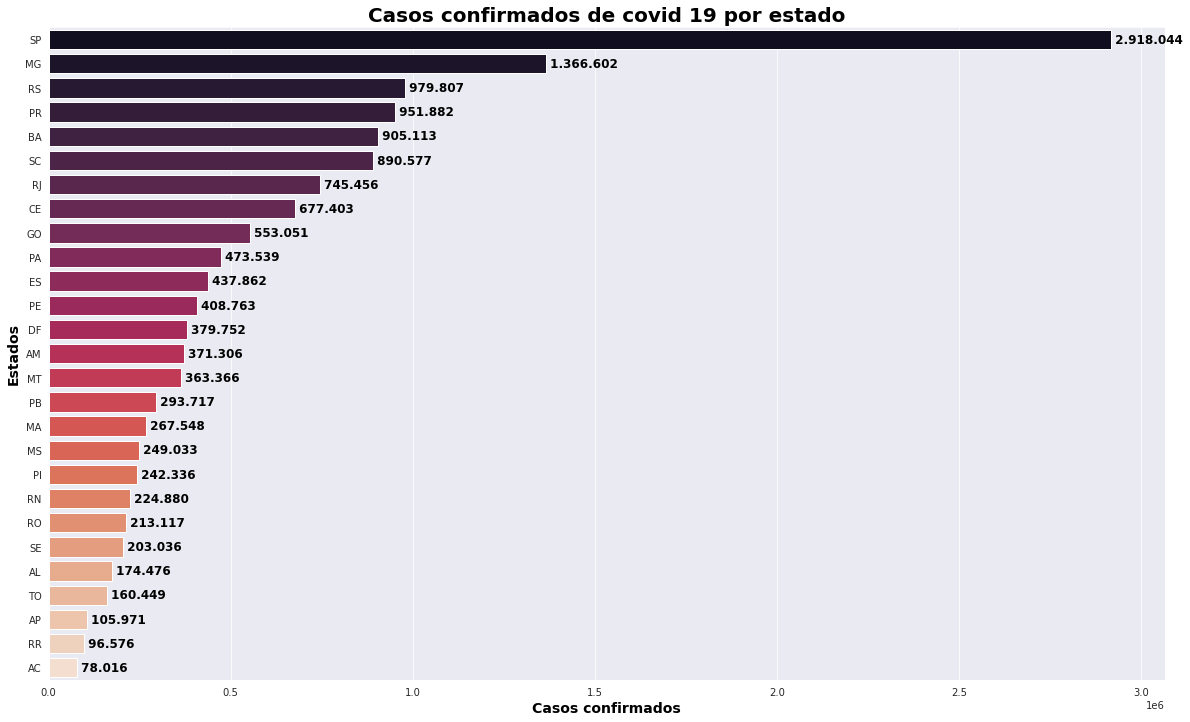

In [90]:
plt.figure(figsize=(20,12))
palette = sns.color_palette("rocket", 27)

ax = sns.barplot(data=data_by_state, x="new_confirmed", y="state", palette=palette)


title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
}

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Casos confirmados de covid 19 por estado", fontdict=title_font)
plt.ylabel("Estados", fontdict=axis_font)
plt.xlabel("Casos confirmados", fontdict=axis_font);

for index, row in data_by_state.reset_index().iterrows():
  ax.text(row.new_confirmed, index, (' {:,.0f}').format(row.new_confirmed).replace(',','.'), fontdict=label, ha='left', va="center")

In [91]:
data_by_state.sort_values("new_deaths", ascending=False, inplace=True)

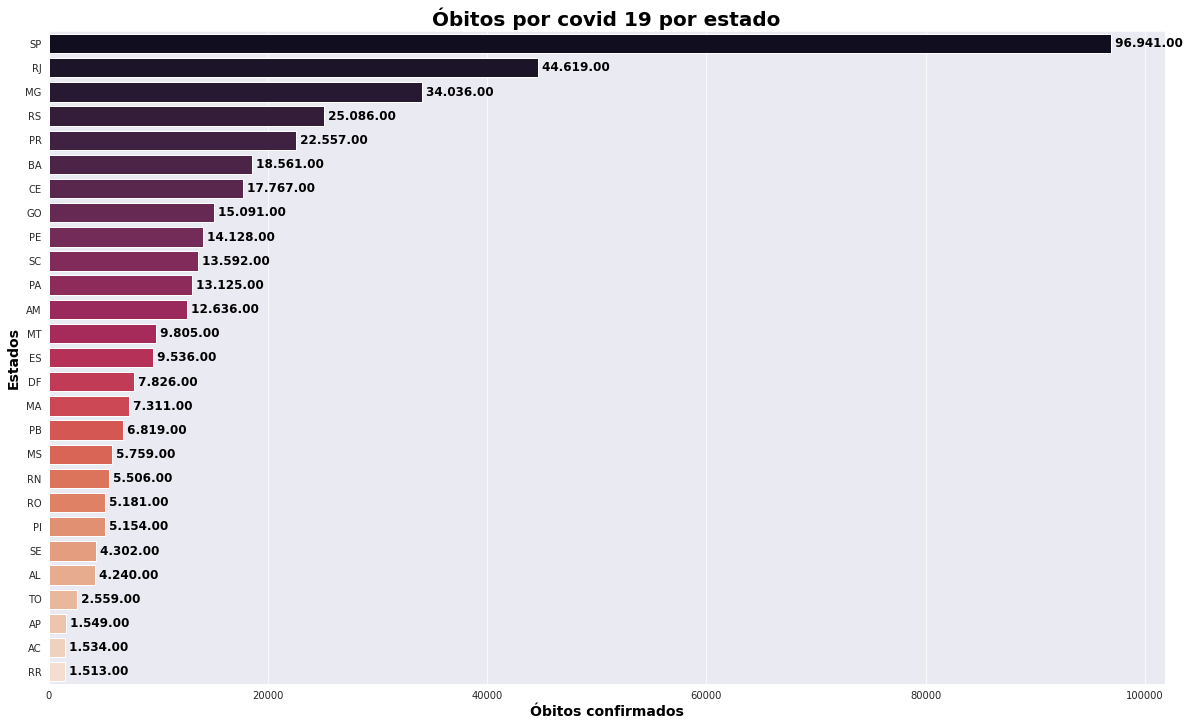

In [92]:
plt.figure(figsize=(20,12))
palette = sns.color_palette("rocket", 27)

ax = sns.barplot(data=data_by_state, x="new_deaths", y="state", palette=palette)


title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
}

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Óbitos por covid 19 por estado", fontdict=title_font)
plt.ylabel("Estados", fontdict=axis_font)
plt.xlabel("Óbitos confirmados", fontdict=axis_font);
for index, row in data_by_state.reset_index().iterrows():
  ax.text(row.new_deaths, index, (' {:,.2f}').format(row.new_deaths).replace(',','.'), fontdict=label, ha='left', va="center")


####Casos confirmados e óbitos a cada 100 mil habitantes

In [93]:
#Obtendo população por estado
population_by_state = full_data_covid.query("place_type == 'state'").groupby("state").max()["estimated_population_2019"]
population_by_state

state
AC      881935.0
AL     3337357.0
AM     4144597.0
AP      845731.0
BA    14873064.0
CE     9132078.0
DF     3015268.0
ES     4018650.0
GO     7018354.0
MA     7075181.0
MG    21168791.0
MS     2778986.0
MT     3484466.0
PA     8602865.0
PB     4018127.0
PE     9557071.0
PI     3273227.0
PR    11433957.0
RJ    17264943.0
RN     3506853.0
RO     1777225.0
RR      605761.0
RS    11377239.0
SC     7164788.0
SE     2298696.0
SP    45919049.0
TO     1572866.0
Name: estimated_population_2019, dtype: float64

In [94]:
#verificando se os dados estão corretos
population_by_state.sum() == brazil_population

True

In [95]:
data_by_state = data_by_state.merge(population_by_state, how='inner', left_on='state', right_on='state')
data_by_state.head()

,state,new_confirmed,new_deaths,estimated_population_2019
0,SP,2918044,96941,45919049.0
1,RJ,745456,44619,17264943.0
2,MG,1366602,34036,21168791.0
3,RS,979807,25086,11377239.0
4,PR,951882,22557,11433957.0


In [96]:
data_by_state['confirmed_by_100k'] = 100000*data_by_state['new_confirmed']/data_by_state['estimated_population_2019']
data_by_state.head()

,state,new_confirmed,new_deaths,estimated_population_2019,confirmed_by_100k
0,SP,2918044,96941,45919049.0,6354.757042
1,RJ,745456,44619,17264943.0,4317.743766
2,MG,1366602,34036,21168791.0,6455.739489
3,RS,979807,25086,11377239.0,8611.992769
4,PR,951882,22557,11433957.0,8325.044427


In [97]:
data_by_state['deaths_by_100k'] = 100000*data_by_state['new_deaths']/data_by_state['estimated_population_2019']
data_by_state.head()

,state,new_confirmed,new_deaths,estimated_population_2019,confirmed_by_100k,deaths_by_100k
0,SP,2918044,96941,45919049.0,6354.757042,211.112822
1,RJ,745456,44619,17264943.0,4317.743766,258.436996
2,MG,1366602,34036,21168791.0,6455.739489,160.783863
3,RS,979807,25086,11377239.0,8611.992769,220.492863
4,PR,951882,22557,11433957.0,8325.044427,197.280784


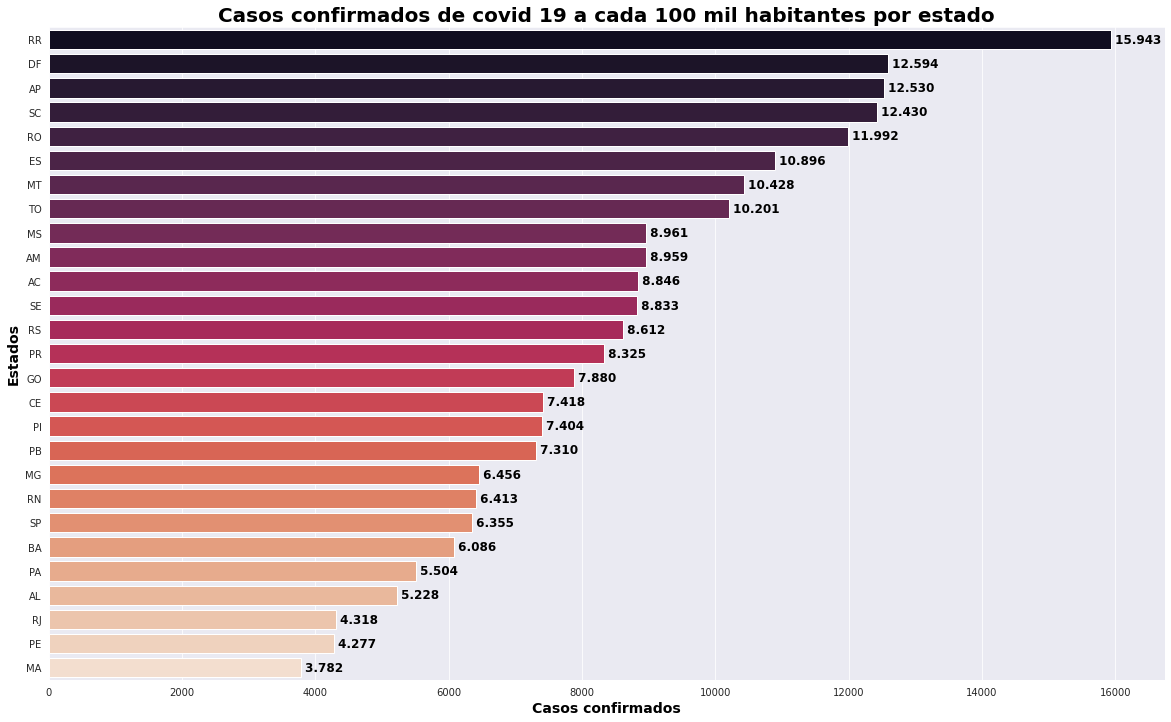

In [98]:
plt.figure(figsize=(20,12))
palette = sns.color_palette("rocket", 27)

ax = sns.barplot(data=data_by_state.sort_values('confirmed_by_100k', ascending=False), x="confirmed_by_100k", y="state", palette=palette)


title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
}

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Casos confirmados de covid 19 a cada 100 mil habitantes por estado", fontdict=title_font)
plt.ylabel("Estados", fontdict=axis_font)
plt.xlabel("Casos confirmados", fontdict=axis_font);

for index, row in data_by_state.sort_values('confirmed_by_100k', ascending=False).reset_index().iterrows():
  ax.text(row.confirmed_by_100k, index, (' {:,.0f}').format(row.confirmed_by_100k).replace(',','.'), fontdict=label, ha='left', va="center")

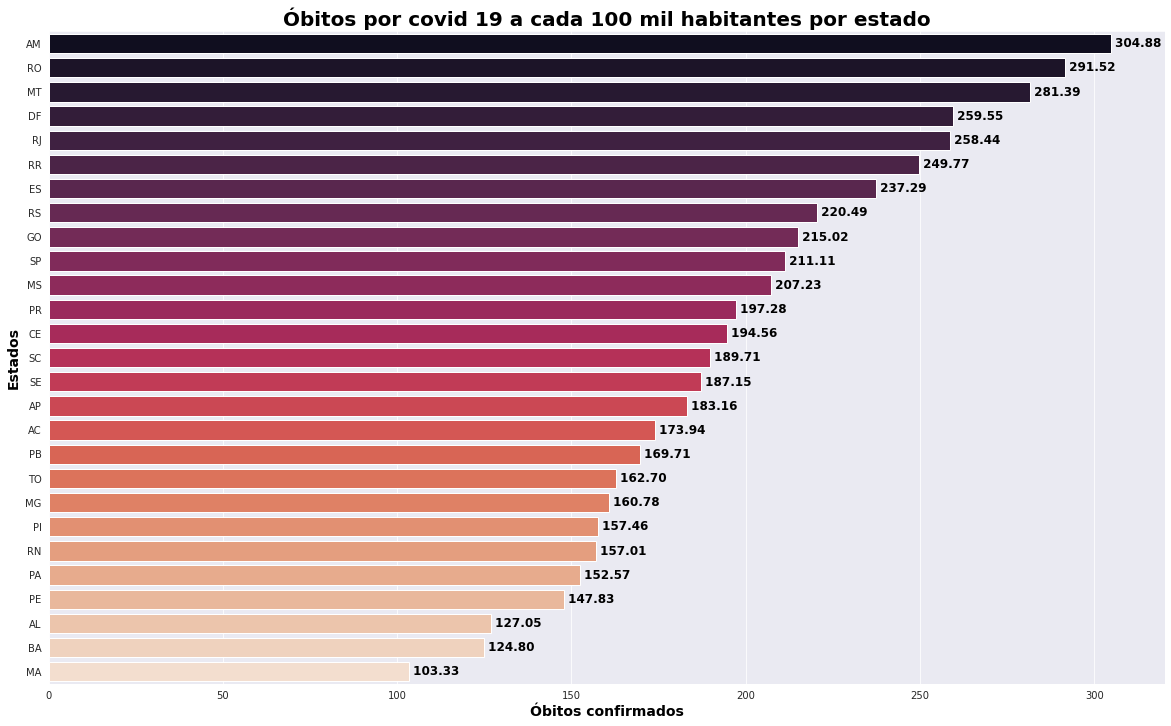

In [99]:
plt.figure(figsize=(20,12))
palette = sns.color_palette("rocket", 27)

ax = sns.barplot(data=data_by_state.sort_values('deaths_by_100k', ascending=False), x="deaths_by_100k", y="state", palette=palette)


title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
}

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

plt.title("Óbitos por covid 19 a cada 100 mil habitantes por estado", fontdict=title_font)
plt.ylabel("Estados", fontdict=axis_font)
plt.xlabel("Óbitos confirmados", fontdict=axis_font);
for index, row in data_by_state.sort_values('deaths_by_100k', ascending=False).reset_index().iterrows():
  ax.text(row.deaths_by_100k, index, (' {:,.2f}').format(row.deaths_by_100k).replace(',','.'), fontdict=label, ha='left', va="center")


####Taxa de letalidade, mortalidade e incidência por estado

In [100]:
data_by_state.head()

,state,new_confirmed,new_deaths,estimated_population_2019,confirmed_by_100k,deaths_by_100k
0,SP,2918044,96941,45919049.0,6354.757042,211.112822
1,RJ,745456,44619,17264943.0,4317.743766,258.436996
2,MG,1366602,34036,21168791.0,6455.739489,160.783863
3,RS,979807,25086,11377239.0,8611.992769,220.492863
4,PR,951882,22557,11433957.0,8325.044427,197.280784


In [101]:
data_by_state["letality"] = data_by_state["new_deaths"]/data_by_state["new_confirmed"]*100
data_by_state["mortality"] = data_by_state["new_deaths"]/data_by_state["estimated_population_2019"]*100000
data_by_state["incidence"] = data_by_state["new_confirmed"]/data_by_state["estimated_population_2019"]*100000
data_by_state = data_by_state.reset_index()
data_by_state[["letality", "mortality", "incidence"]].sort_values("letality", ascending=True).head()

,letality,mortality,incidence
24,1.461721,183.155164,12530.107091
9,1.526202,189.705543,12429.914186
26,1.566642,249.768473,15942.921383
23,1.594899,162.696631,10201.059722
25,1.966263,173.935721,8846.003390


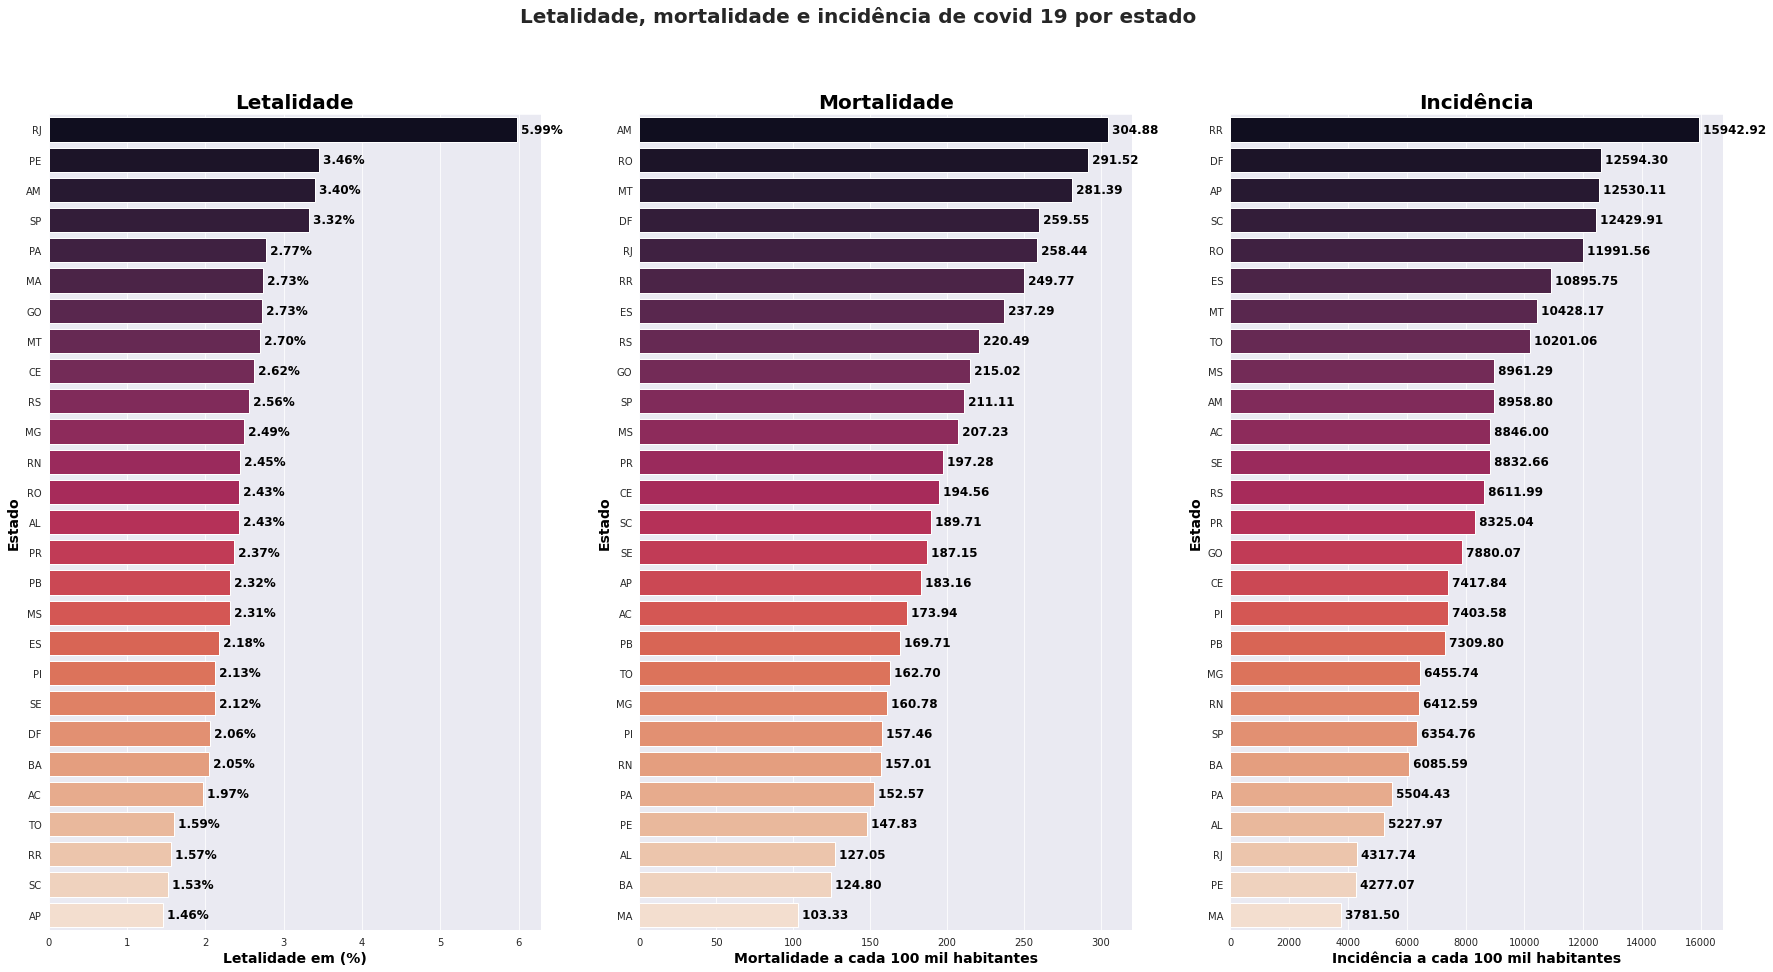

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(30, 15))
palette = sns.color_palette("rocket", 27)

title_font = {
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

axis_font = {
  'color':  'black',
  'weight': 'bold',
  'size': 14,
}

label = {
  'color':  'black',
  'weight': 'bold',
  'size': 12,
}

letlaity_order = data_by_state['letality']

fig.suptitle('Letalidade, mortalidade e incidência de covid 19 por estado', fontsize=20, fontweight='bold')

data_by_state = data_by_state.sort_values("letality", ascending=False)
# data_by_state
sns.barplot(ax=axes[0], data=data_by_state, x="letality", y="state", palette=palette)
axes[0].set_title('Letalidade', fontdict=title_font)
axes[0].set_ylabel('Estado',  fontdict=axis_font)
axes[0].set_xlabel('Letalidade em (%)',  fontdict=axis_font)
for index, row in data_by_state.reset_index().iterrows():
  axes[0].text(row.letality, index, (' {:.2f}%').format(row.letality), fontdict=label, ha='left', va="center")

data_by_state = data_by_state.sort_values("mortality", ascending=False)
sns.barplot(ax=axes[1], data=data_by_state, x="mortality", y="state", palette=palette)
axes[1].set_title('Mortalidade', fontdict=title_font)
axes[1].set_ylabel('Estado', fontdict=axis_font)
axes[1].set_xlabel('Mortalidade a cada 100 mil habitantes', fontdict=axis_font);
for index, row in data_by_state.reset_index().iterrows():
  axes[1].text(row.mortality, index, (' {:.2f}').format(row.mortality), fontdict=label, ha='left', va="center")

data_by_state = data_by_state.sort_values("incidence", ascending=False)
sns.barplot(ax=axes[2], data=data_by_state, x="incidence", y="state", palette=palette)
axes[2].set_title('Incidência', fontdict=title_font)
axes[2].set_ylabel('Estado', fontdict=axis_font)
axes[2].set_xlabel('Incidência a cada 100 mil habitantes', fontdict=axis_font);
for index, row in data_by_state.reset_index().iterrows():
  axes[2].text(row.incidence, index, (' {:.2f}').format(row.incidence), fontdict=label, ha='left', va="center")

####Observações sobre os dados estaduais



1.   São Paulo é estado com  uma população consideravelmente maior que os demais estados aparece em primeiro lugar em número de casos confirmados e óbitos.

2.   O Rio de Janeiro, apesar de ser o terceiro estado em população, aparece na segunda posição no número de óbitos. A taxa de letalidade ajuda a explicar este alto número de óbitos.

3. Quando normalizamos os dados por 100 mil habitantes, podemos reparar que o desempenho dos estados muda e Roraima e Amazonas passam a ser, respectivamente, os estados com maiores número de casos e óbitos proporcionais a população.
